<h1><center> Laboratorio di WebScraping </h1>
<h1><center> Anno Accademico 2024-2025 </h1>
<h1><center>  Docente: Laura Ricci </h1>
<h1><center>  Lezione 17 </h1>
<h1><center>  Community Detection: Girvan Newmann</h1> 
<h1><center>  Scale Free Networks e Power Laws</h1> 
<h1><center> 4 Aprile 2025 </h1>

## Community detection

* diversi metodi per il calcolo delle comunità
    * **bridge removal**
    * **modularity optimization**
    * **label propagation**
    * **stochastic block modeling**
*  analizzeremo l'algoritmo di **Girvan Newman**, basato sul concetto di **bridge removal**

## Componenti connesse

* un grafo non orientato G = (V, E) si dice **connesso** se esiste un cammino tra ogni coppia di vertici in G

True

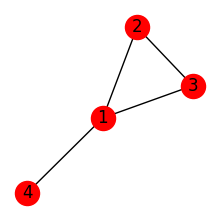

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_edges_from([(1,2),(2,3),(1,3),(1,4)])
fig = plt.figure(figsize=(2, 2))
nx.draw(G, node_color='red',with_labels=True)
nx.is_connected(G)

## Componenti connesse

* sia dato un grafo **G = (V,E)** non orientato. 
* le **componenti connesse di G** sono le **classi di equivalenza** dei suoi vertici rispetto alla relazione **"essere raggiungibile da"**

False


2

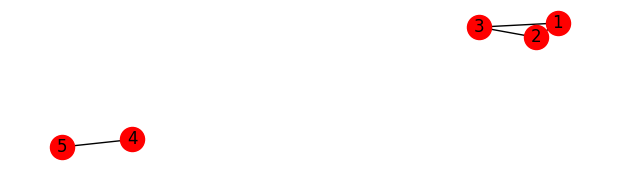

In [2]:
G = nx.Graph()
nx.add_cycle(G, (1,2,3), node_color='red')
G.add_edge(4,5)
fig = plt.figure(figsize=(6, 1.5))
nx.draw(G, node_color='red', with_labels=True)
print(nx.is_connected(G))
nx.number_connected_components(G)

## Community detection: Girvan-Newman

* **bridge**: un arco la cui rimozione partiziona la rete in due cluster di nodi (o comunità)
* l'algoritmo individa una sequenza di **probabili bridges** e li rimuove, uno dopo l'altro
* dopo la rimozione di ogni bridge, le **componenti connesse** del grafo rappresentano le comunità 
* per identificare i **bridges** l'algoritmo utilizza una nozione di centralità, la **edge betweenness**
    * estensione del concetto di **node betweeness centrality** agli archi del grafo
    * indica quanti **cammini minimi** passano attraverso un certo **arco del grafo**
    * è maggiore per gli archi che rappresentano **bridges** tra cluster diversi rispetto ad archi che connettono elementi all'interno di un cluster
    * ad ogni passo si elimina l'arco con edge betweeness maggiore

## Community detection: Girvan-Newman

* l'algoritmo iterativamente identifica e rimuove l'arco con la **edge betweeness più alta**
* crea una **sequenza di partizioni** del grafo
    * calcola la **edge betweness centrality** per tutti gli archi del grafo (composto eventualemente da più partizioni)  
    * rimuove l'arco con la **edge betweeness più alta** 
    * calcola le **componenti connesse** del grafo **dopo la rimozione**
    * ripete la procedura fintanto che tutti i link sono stati rimossi ed i nodi risultano isolati (una componente per ogni nodo)
* valuta ogni partizione del grafo calcolata dall'algoritmo
    * da quella in cui tutti i  nodi sono in una sola partizione a quella in cui tutti i nodi sono isolati
* restituisce la partizione con il valore più alto della **modularità** 
* durante questo processo, il numero di componenti connesse nel grafo aumenta  man mano che i cluster vengono separati. 
* poiché si rimuove un collegamento per volta, il numero di componenti connesse può aumentare al massimo di uno tra un passo e l'altro dell'algoritmo
    * un singolo nodo connette al massimo due vertici e, di conseguenza, due componenti


## Girvan-Newman su Zachary's karate club

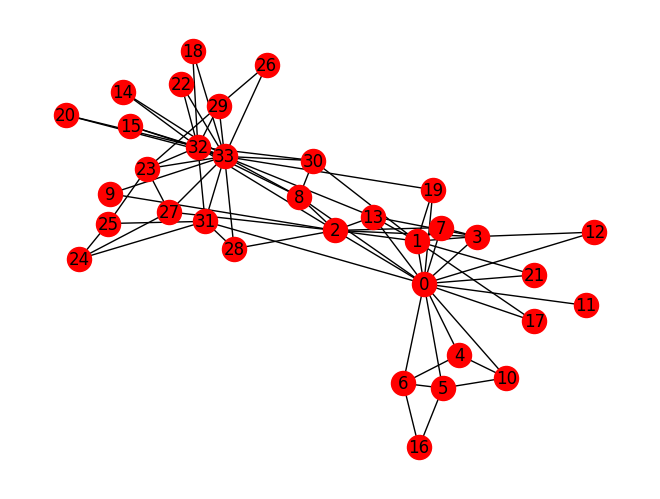

In [3]:
import networkx as nx
G = nx.karate_club_graph()
nx.draw(G, node_color='red', with_labels=True)

## Calcolo della betweeness centrality degli archi del grafo

In [4]:
my_edge_betweenness=nx.edge_betweenness_centrality(G)
print(type(my_edge_betweenness))

<class 'dict'>


* **my_edge_betweenness** è un  dizionario con
    * **chiavi** le **tuple di nodi che formano gli archi**
    * ogni valore rappresenta la **betweenness centrality**  di un arco. 

## Calcolo della betweeness centrality degli archi del grafo

In [5]:
my_edge_betweenness

{(0, 1): 0.025252525252525245,
 (0, 2): 0.0777876807288572,
 (0, 3): 0.02049910873440285,
 (0, 4): 0.0522875816993464,
 (0, 5): 0.07813428401663694,
 (0, 6): 0.07813428401663695,
 (0, 7): 0.0228206434088787,
 (0, 8): 0.07423959482783014,
 (0, 10): 0.0522875816993464,
 (0, 11): 0.058823529411764705,
 (0, 12): 0.04652406417112298,
 (0, 13): 0.04237189825425121,
 (0, 17): 0.04012392835922248,
 (0, 19): 0.045936960642843,
 (0, 21): 0.040123928359222474,
 (0, 31): 0.1272599949070537,
 (1, 2): 0.023232323232323233,
 (1, 3): 0.0077243018419489,
 (1, 7): 0.007422969187675069,
 (1, 13): 0.01240556828792123,
 (1, 17): 0.01869960105254222,
 (1, 19): 0.014633732280791102,
 (1, 21): 0.01869960105254222,
 (1, 30): 0.032280791104320514,
 (2, 3): 0.022430184194890075,
 (2, 7): 0.025214328155504617,
 (2, 8): 0.009175791528732704,
 (2, 9): 0.030803836686189627,
 (2, 13): 0.007630931160342923,
 (2, 27): 0.04119203236850296,
 (2, 28): 0.02278244631185807,
 (2, 32): 0.06898678663384543,
 (3, 7): 0.00336558

## Calcolo della betweeness centrality degli archi del grafo

In [6]:
my_edge_betweenness[0, 1]

0.025252525252525245

In [7]:
my_edge_betweenness.get((0, 1))

0.025252525252525245

## Individuare l'arco con la betweeness maggiore

In [8]:
most_valuable_edge = max(G.edges(), key=my_edge_betweenness.get)

* **max(iterable, key=function)**
    * **iterable**: una lista, un dizionario, etc.
    * **key=function**: una funzione che, applicata ad ogni elemento dell'iterable, restituisce un **valore**
    * applica la funzione ad ogni elemento dell'iterable e restituisce il valore massimo
* nel nostro caso
    * **G.edges()** itera su tutti gli del grafo **G**, ogni arco è rappresentato dalla tupla **(node1, node2)**.
    * **my_edge_betweenness.get** è usata come una **funzione** che restitusice i valori di betweeness associati agli archi


## Rimuovere l'arco con la betweeness maggiore

In [9]:
G.remove_edge(*most_valuable_edge)

* l'operatore **star** 
    * esegue l'**unpacking** della tupla negli argomenti di una funzione. 
    * **tuple unpacking**  permette di assegnare i valori di una tupla (o di qualsiasi altro iterabile) a più variabili in     un'unica istruzione
  
* se si vuole rimuovere l'arco **(0, 31)**, allora si può anche usare
    * **G.remove_edge(most_valuable_edge[0], most_valuable_edge[1])**
    * oppure
    * **G.remove_edge(0, 31)**

## Calcolare le componenti connesse

In [10]:
nx.connected_components(G)
list(nx.connected_components(G))

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33}]

## L'algoritmo di Girvan Newman

In [11]:
G = nx.karate_club_graph()
partition_sequence = []
for _ in range(G.number_of_edges()):
    my_edge_betweenness = nx.edge_betweenness_centrality(G)
    most_valuable_edge = max(G.edges(), key=my_edge_betweenness.get)
    G.remove_edge(*most_valuable_edge)
    my_partition = list(nx.connected_components(G))
    partition_sequence.append(my_partition)
len(partition_sequence), nx.karate_club_graph().number_of_edges()

(78, 78)

## L'algoritmo di Girvan Newman

In [12]:
len(partition_sequence[0])

1

* siamo partiti da un grafo connesso, la rimozione di un singolo arco può non disconnette il grafo
* quindi la nostra prima partizione  ha solo una comunità.

In [13]:
len(partition_sequence[-1]), nx.karate_club_graph().number_of_nodes()

(34, 34)

* l'ultima partizione ha un nodo per ogni comunità

## Valutare la modularità di ogni partizione 

In [47]:
def modularity(G, partition):
    W = sum(G.edges[v, w].get('weight', 1) for v, w in G.edges)
    summation = 0
    for cluster_nodes in partition:
        s_c = sum(G.degree(n, weight='weight') for n in cluster_nodes)
        # Use subgraph to count only internal links
        C = G.subgraph(cluster_nodes)
        W_c = sum(C.edges[v, w].get('weight', 1) for v, w in C.edges)
        summation += W_c - s_c ** 2 / (4 * W)  
    return summation / W

## Valutare la modularità di ogni partizione 

In [15]:
G = nx.karate_club_graph()
modularity_sequence = [modularity(G, p) for p in partition_sequence]
modularity_sequence

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.34766027623170476,
 0.34766027623170476,
 0.34766027623170476,
 0.3423192968647515,
 0.3423192968647515,
 0.3423192968647515,
 0.3423192968647515,
 0.3580611307884035,
 0.3580611307884035,
 0.3580611307884035,
 0.3580611307884035,
 0.3580611307884035,
 0.3580611307884035,
 0.38497217068645645,
 0.37578006409175246,
 0.37578006409175246,
 0.3594760218136842,
 0.3594760218136842,
 0.3470699574595679,
 0.3470699574595679,
 0.333249002080171,
 0.333249002080171,
 0.3134405277262421,
 0.3134405277262421,
 0.3122598901819681,
 0.3122598901819681,
 0.3036862127771219,
 0.3036862127771219,
 0.2942973332583722,
 0.2942973332583722,
 0.2827158411573995,
 0.2827158411573995,
 0.27116245947414774,
 0.27116245947414774,
 0.2544648713479881,
 0.2544648713479881,
 0.2397537527407657,
 0.2397537527407657,
 0.22689792170311643,
 0.22299057363992422,
 0.22299057363992422,
 0.22299057363992422,
 0.20056783043796034,
 0.20056783043796034,
 0.1

## Visualizzare l'andamento della modularità

Text(0.5, 0, 'Algorithm step')

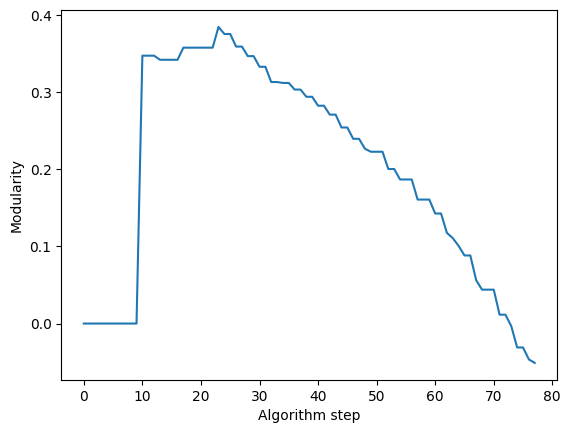

In [16]:
import matplotlib.pyplot as plt
plt.plot(modularity_sequence)
plt.ylabel('Modularity')
plt.xlabel('Algorithm step')

## Individuare la partizione con la modularità maggiore

In [18]:
def my_modularity(partition):
    return nx.community.quality.modularity(G, partition)
best_partition = max(partition_sequence, key=my_modularity)
best_partition

[{0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
 {2, 24, 25, 27, 28, 31},
 {4, 5, 6, 10, 16},
 {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
 {9}]

* la partizione migliore ha 5 componenti

## Visualizzare la migliore partizione del grafo

In [19]:
def create_partition_map(partition):
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    return partition_map

* **enumerate** aggiunge un indice ad un **elemento iterabile**
* ogni partizione è così caratterizzata da un indice
* ogni nodo di una partizione viene associato al rispettivo indice

## Visualizzare la migliore partizione

In [20]:
best_partition_map = create_partition_map(best_partition)
node_colors = [best_partition_map[n] for n in G.nodes()]
node_colors[:5]

[0, 0, 1, 0, 2]

* per ogni nodo del grafo si estrae l'etichetta di quel nodo corrispondente alla sua **comunità** e si memorizza in colors
* l'etichetta del nodo viene usata per individuare il suo colore
* i colori utilizzati dalla **draw** possono essere 
    * RGB values
    * nomi di colori
    * valori numerici, che vengono poi mappati in colori

## Visualizzare la migliore partizione

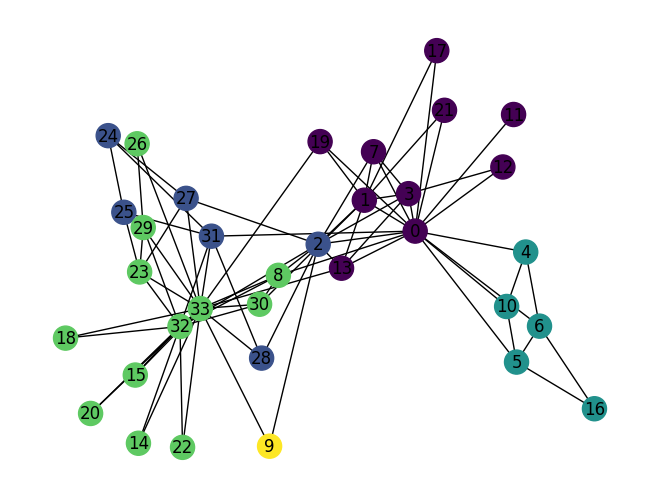

In [21]:
nx.draw(G, with_labels=True, node_color=node_colors)

## Modularità della partizione migliore

In [22]:
nx.community.quality.modularity(G, best_partition)

0.3849721706864564

## Definire a priori il numero delle partizioni

In [23]:
for partition in partition_sequence:
    if len(partition) == 2:
        two_cluster_partition = partition
        break
two_cluster_partition

[{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]

## Definire il numero delle partizioni

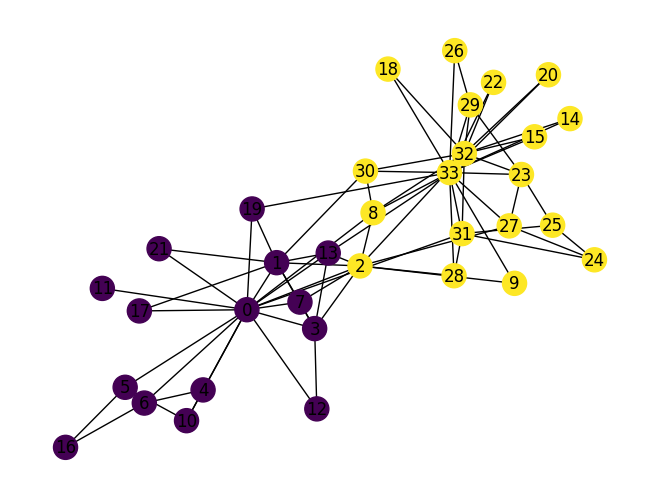

In [24]:
two_cluster_partition_map = create_partition_map(two_cluster_partition)
node_colors = [two_cluster_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors)

## Modularità della soluzione con 2 partizioni

In [25]:
nx.community.quality.modularity(G, two_cluster_partition)

0.3476602762317048

## Confronto con le comunità "semantiche"

Text(0.5, 1.0, 'Actual communities')

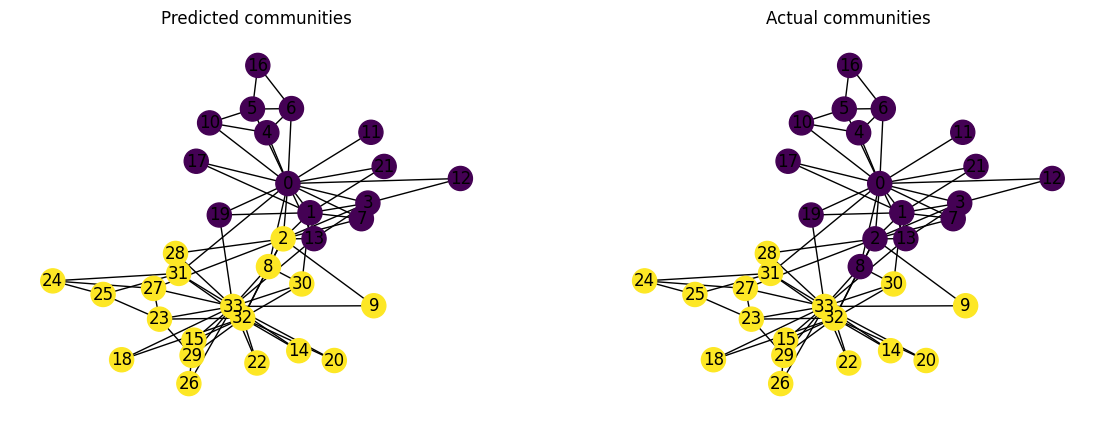

In [26]:
import matplotlib.pyplot as plt
pos = nx.layout.spring_layout(G)
fig = plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
two_cluster_partition_map = create_partition_map(two_cluster_partition)
node_colors = [two_cluster_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors, pos=pos)
plt.title('Predicted communities')
plt.subplot(1, 2, 2)
node_colors = [G.nodes[n]['club'] == 'Officer' for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors, pos=pos)
plt.title('Actual communities')

## Confronto con le comunità "semantiche"

* le etichette di comunità previste sono abbastanza accurate
* differiscono solo per un paio di nodi che  sembrano poter appartenere plausibilmente a entrambi i gruppi. 
* L'articolo originale di Zachary spiega  le considerazioni pratiche di uno di questi nodi erroneamente previsti
    * lo studente 8 era molto vicino a ricevere la cintura nera da Mr. Hi e quindi non voleva lasciare il gruppo, 
    anche se diversi suoi amici lo fecero.

## Girvan Newman in NetworkX

In [27]:
nx.community.girvan_newman(G)
list(nx.community.girvan_newman(G))[:5]

[({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
  {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}),
 ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
  {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
  {9}),
 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
  {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
  {4, 5, 6, 10, 16},
  {9}),
 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
  {9}),
 ({0, 1, 3, 7, 12, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
  {9},
  {11})]

## Modelli di reti: Scale Free Networks

* esistono diverse reti 
    * reti sociali
    * reti tecnologiche, come Internet
    * reti ecologiche (preda-predatore, proteine,...)
* che sono caratterizzate da
    * small world 
    * high clustering
    * esiste una grande variabilità nei gradi dei nodi, non presente nelle reti generate da **WS**
* reti con queste distribuzioni dei gradi dei nodi vengono dette **scale free networks**
    * la distribuzione dei gradi dei nodi segue una legge **power law**
* i modelli visti fino ad ora (**Erdos Renyi** e **Watts Strogatz**) non sono adatti per descrivere questa distribuzione dei nodi
* nelle slide successive vedremo
    * cosa è una distribuzione **power law**
    * un nuovo modello, quello di **Barabasi Albert**, in grado di generare reti **scale free**


## Modelli di Reti sociali

* **Watts Strogatz**
  * modella la caratteristica  **small world** di molte reti sociali
  * è il modello giusto per modellare tutte le caratteristiche di una rete sociale?
* analizziamo il sottoinsieme di **Facebook** che abbiamo introdotto in una lezione precedente   
* vedremo che **WS** riesce a cogliere la caratteristica di **Small World** della rete sociale, ma  non riesce a modellare in modo appropriato la distribuzione dei gradi dei nodi
* un nuovo modello per le reti sociali
    * **Barabasi Albert Model (BA)**

## Il dataset di Facebook

* utilizziamo il dataset di **Facebook** visto in una lezione precedente e consideriamo solo le **relazioni di amicizia**
* ricordiamo che
    * il grafo delle amicizie è  ricavato da una rete di amicizie più grande
    * sono stati considerati alcuni nodi iniziali e sono state considerate le **ego networks**
    * la rete comprende la ego network di ognuno di questi nodi
        * il nodo, i suoi amici e le relazioni di amicizia tra i suoi amici
    * le ego networks sono state poi combinate
    * il grafo risultante contiene un sottoinsieme di Facebook
* a differenza del DataSet considerato nella lezione precedente
    * i dati sono memorizzati in un **file di testo** e non in un **file csv** 
        * valori separati da uno spazio bianco
        * questo tipo di file viene indicato in genere come **edgelist**
    * l'identificatore di ogni nodo è un intero (gli identificatori sono stati parsati per rendere più facile l'elaborazione)
    

## Il dataset di Facebook

<center>
<img src="Figures/EdgeList.jpg" style="width:500px;height:300px;"/>

## Il dataset di Facebook

In [28]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
import pandas as pd
pd.read_csv('DataSet/facebook_combined.txt.gz', names=['FriendShipRelation'] )


,FriendShipRelation
0,0 1
1,0 2
2,0 3
3,0 4
4,0 5
...,...
88229,4026 4030
88230,4027 4031
88231,4027 4032
88232,4027 4038


* se leggiamo il file come fosse un **csv**, la coppia di identificatori di una coppia di amici viene considerata un solo valore
* necessario un metodo diverso per l'acquisizione dei dati

## Il dataset di Facebook

<code>  array = np.loadtxt(filename, dtype=int) </code>
  * utilizzata principalmente per leggere e scrivere **arrays** o **matrici** da **file di testo**
  * se non indicato, il delimitatore per separare i dati è lo spazio bianco
  * unica restrizione: ogni riga deve avere lo stesso numero di elementi
  * <code> dtype </code> indica il tipo dei dati dell'array risultato
  * restituisce un array n-dimensionale di <code> NumPy</code>: nel nostro caso, poichè ogni riga contiene due valori l'array ha **4039** righe e **2** colonne
  * ma perchè inserire i dati in un array <code> NumPy</code>?
    * **NetworkX** possiede un metodo per costruire in grafo a partire  da un qualsasi **iterable container**
     <code>  G.add_edges_from(array) </code>    

## Il dataset di Facebook

In [31]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns 

def read_graph(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    print("shape of data:",array.shape)
    print("datatype of data:",array.dtype)
    G.add_edges_from(array)
    return G
fb= read_graph('DataSet/facebook_combined.txt.gz')
n = len(fb.nodes())
m = len(fb.edges())
n, m


shape of data: (88234, 2)
datatype of data: int64


(4039, 88234)

## Il Dataset di Facebook: grado medio dei nodi

* quale è il grado medio dei nodi?
* considerare che ogni arco incide su due nodi

In [30]:
k = int(round(2*m/n))
k

44

## Il Dataset di Facebook: coefficente di clustering

* utilizziamo un **approccio approssimato**,  diverso rispetto a quello presentato in una lezione precedente, per diminuire il tempo di esecuzione
    * **random sampling**
    * selezione casuale di un insieme di nodi e calcolo del coefficente di clustering per i nodi di questo insieme

In [32]:
from networkx.algorithms.approximation import average_clustering
# Impostiamo il seed random in modo che la funzione random produca tutte le volte lo stesso risultato
np.random.seed(17)
C = average_clustering(fb)
C

0.582

## Il Dataset di Facebook: lunghezza dei cammini

* adottiamo lo stesso approccio approssimato per calcolare la lunghezza media dei cammini

In [33]:
def sample_path_lengths(G, trials=1000):
    # Scelta random di un insieme di coppie di nodi e calcolo della lunghezza dei cammini tra le coppie
    # trials: numero delle coppie da cui scegliere

    nodes = list(G)
    pairs = np.random.choice(nodes, (trials, 2))
    lengths = [nx.shortest_path_length(G, *pair) 
                               for pair in pairs]
    return lengths

def estimate_path_length(G, trials=1000):
    return np.mean(sample_path_lengths(G, trials))

L = estimate_path_length(fb)
L


np.float64(3.717)

* clustering coefficient alto, lunghezza media dei cammini bassi: è una small world

## Modellare Facebook con WS, p=0

* costruiamo un grafo di **WS** con caratteristiche analoghe al grafo di **Facebook**
* numero di nodi **n=4039**
* numero medio di vicini **k=44**


In [34]:
n=4039
k=44
lattice_graph = nx.watts_strogatz_graph(n, k, p=0)
print(len(lattice_graph.edges()))
print(C, average_clustering(lattice_graph))


88858
0.582 0.731


* il clustering coefficient è un pò più alto di quello del DataSet reale, ma dello stesso ordine di grandezza

In [35]:
L, estimate_path_length(lattice_graph)

(np.float64(3.717), np.float64(47.088))

* la differenza tra le lunghezze medie dei cammini è enorme
* il risultato è atteso perchè impostando **p=0**, non abbiamo aggiunto alcun elemento di casualità

## Modellare Facebook con WS, p=1

* numero di nodi **n=4039**
* numero medio di vicini **k=44**
* probabilità di riavvolgere archi **p=1**

In [36]:
random_graph = nx.watts_strogatz_graph(n, k, 1)
print(C, average_clustering(random_graph))
print(L, estimate_path_length(random_graph))

0.582 0.016
3.717 2.601


* la lunghezza dei cammini è abbastanza confrontabile
* il coefficente di clustering è troppo basso!

## Modellare Facebook con WS, p=0.05

In [37]:
ws = nx.watts_strogatz_graph(n, k, 0.05, seed=15)
print(C, average_clustering(ws))
print(L, estimate_path_length(ws))

0.582 0.618
3.717 3.264


* valori paragonabili di clustering coefficient e lunghezza media dei cammini
* in questo caso **WS** modella perfettamente la caratteristica di **small world** del dataset reale!

## Facebook e Watts Strogatz: grado dei nodi

* analizziamo grado medio e varianza dei nodi di **Facebook** e della rete **WS** e confrontiamole
* utilizziamo le funzioni <code>mean</code> e <code>std</code> di <code>numpy</code>
    * applicate, per default,  a strutture <code>array</code> di <code>numpy</code>
    * se viene passata un'altra struttura compatibile (nel nostro caso una lista), si effettua la conversione


In [41]:
def degrees(G):
    return [G.degree(u) for u in G]
print(np.mean(degrees(fb)), np.mean(degrees(ws)))
print(np.std(degrees(fb)), np.std(degrees(ws)))


43.69101262688784 44.0
52.41411556737521 1.4309215628189869


## Facebook e Watts Strogatz: grado dei nodi

* la media dei gradi dei nodi del modello si avvicina molto alla media del grado dei nodi di Facebook
* ma la **varianza è molto diversa**!
* la varianza è molto alta per **Facebook**
    * alcuni hanno tantissimi amici, altri molto pochi
* non è altrettanto alta per **WS**

## La libreria empiricaldist

* fornisce la funzione **Pmf (Probability Mass Function)**
* restituisce una **Pandas Series** che rappresenta la distribuzione di probabilità dei valori in input

In [38]:
import empiricaldist
from empiricaldist import Pmf
df_1 = Pmf.from_seq([1,2,3,4,5,6])
df_1

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


## La libreria empiricaldist

In [39]:
from empiricaldist import Pmf
df_2 = Pmf.from_seq([1,2,2,2,5,6])
df_2

,probs
1,0.166667
2,0.500000
5,0.166667
6,0.166667


## Facebook e Watts Strogatz: grado dei nodi

* analizziamo e visualizziamo la **distribuzione** del grado dei nodi per **Facebook** e **WS** e confrontiamoli
* notare come un modulo possa essere installato direttamente dallo script **Python**

In [42]:
try:
    import empiricaldist
except ImportError:
    !pip install empiricaldist    
pmf_fb = Pmf.from_seq(degrees(fb))
pmf_fb.mean(), pmf_fb.std()  

(np.float64(43.69101262688785), np.float64(52.41411556737521))

In [44]:
pmf_ws = Pmf.from_seq(degrees(ws))
pmf_ws.mean(), pmf_ws.std()


(np.float64(44.00000000000001), np.float64(1.4309215628189869))

## Facebook e Watts Strogats: grado dei nodi

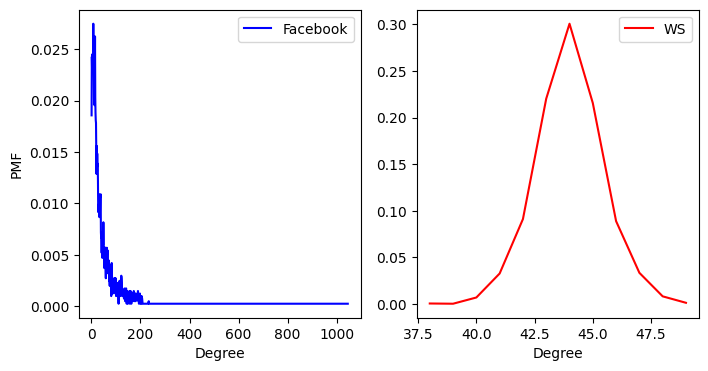

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(pmf_fb,'b',label="Facebook")
plt.xlabel('Degree')
plt.ylabel('PMF')
plt.legend(loc="upper right")
plt.subplot(1,2,2)
plt.plot(pmf_ws,'r',label="WS")
plt.xlabel('Degree')
plt.legend(loc="upper right")
plt.show()


* in **WS** la distribuzione classica è **a campana**: la maggior parte dei nodi ha grado **44**
* in  Facebook ci sono molto nodi di utenti con 1 o 2 amici, ma ci sono anche nodi che hanno più di 1000 amici!
* la distribuzione del grado dei nodi in **Facebook** è di tipo **heavy-tailed** o **power law**
    * molti nodi di grado basso e pochi nodi con grado alto, e questi hanno gradi tutti diversi tra loro

## Power Law Distribution

* è una distribuzione di probabilità definita come segue

<center>
$ PMF(k) \sim k^{-\alpha} $
</center>
 
* $\alpha$ è un parametro: in genere vale $2$ oppure $3$
* nel nostro caso, $PMF(k)$ è la frazione dei nodi di grado k
* $\sim$ indica che la $PFM$ si avvicina asintoticamente a $k^{-\alpha}$, al crescere di $k$

* la probabilità di un certo valore $k$ decresce, ma non **esponenzialmente**

* altri esempi
    * distribuzione delle popolazione delle città USA
        * la maggior parte delle città ha pochi abitanti, ma ci sono poche città con un gran numero di abitanti
    * tutte le città con un gran numero di abitanti hanno un numero diverso di abitanti
    * la probabilità di avere città con **100** abitanti è grande
    * la probabilità  doi avere una città con **1000000** è bassa, ma non nulla


## Power Law Distribution su scala logaritmica

* una power law è rappresentata come una linea in **log-log scale**
    * scala logaritmica sia sull'asse delle x che sull'asse delle y

* consideriamo la seguente **power law**
    <center>
    $ y = C \times k^{-\alpha} $
    </center>

* calcoliamo il logaritmo sia della parte destra che della parte sinistra 

    <center>
    $ log(y) = {-\alpha} \times log(k) +  log(C)  $
    </center>

* ponendo 
    * $ Y= log(y) $
    * $X = log(k)$
    * $m=-\alpha$
    * $q=log(C)$
* si ottine la retta seguente il cui coefficente angolare dipende da $\alpha$
 <center>
   $Y=mX+q$
 </center>


## Power Law Distribution: esempi

<center>
<img src="Figures/PowerLaw1.jpg" style="width:800px;height:600px;"/>

## Power Law Distribution: esempi

<center>
<img src="Figures/PowerLaw2.jpg" style="width:800px;height:600px;"/>